# pyinstaller打包工具
## manifest引发的问题

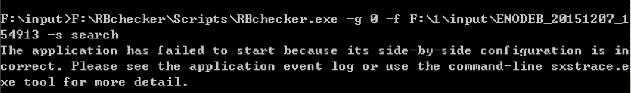

In [3]:
from IPython.display import Image
Image(filename=u"..\images\pyinstaller1.png")
#用pyinstaller做好的exe，在其他机器运行，出现如下问题

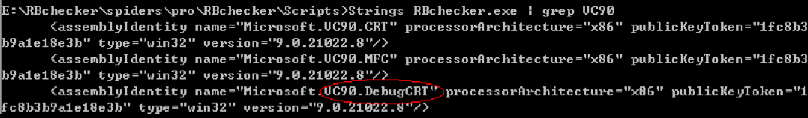

In [5]:
from IPython.display import Image
Image(filename=u"..\images\pyinstaller2.png")
#使用Strings查看exe的manifest，发现多了DebugCRT；通常情况下，一般机器不会包含Debug版的运行库，哪里来的？

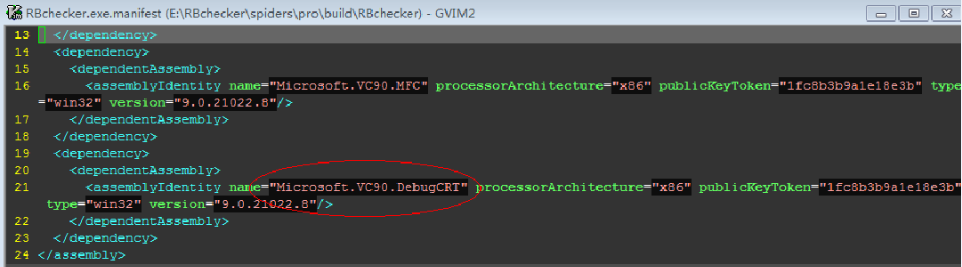

In [7]:
from IPython.display import Image
Image(filename=u"..\images\pyinstaller3.png")
#pyinstaller产生的manifest也包含DebugCRT

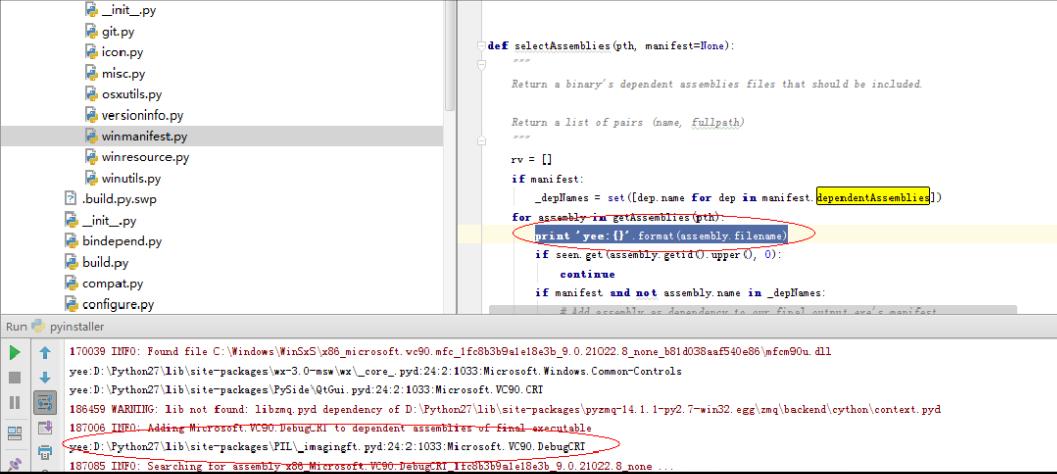

In [9]:
from IPython.display import Image
Image(filename=u"..\images\pyinstaller4.png")
#在pyinstaller源码中，添加打印信息，发现有一个pyd的manifest包含了Debug，真是“一粒屎坏了一锅粥”啊！！！可以用Strings查看，证实一下

## pyinstaller打包流程
    1、分析python.exe、python.dll以及各依赖pyd的manifest，得到运行库（crt、mfc、alt等）最大集合，然后生成可执行的manifest文件，最终嵌入exe

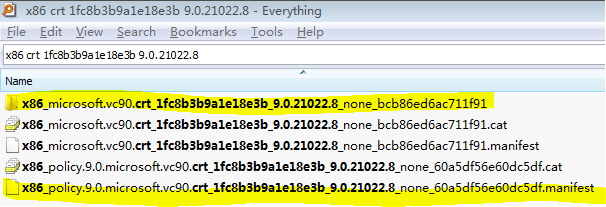

In [10]:
from IPython.display import Image
Image(filename=u"..\images\pyinstaller5.png")

    2、添加额外资源和库

    pyinstaller -p /usr/lib64/python3.6/site-packages main.spec

    #main.spec中添加这段   
    #pyinstaller --add_data只能一个个文件添加
    def extra_datas(mydir, dstdir):
        def rec_glob(p, files):
            import os
            import glob
            for d in glob.glob(p):
                if os.path.isfile(d):
                    files.append(d)
                rec_glob("%s/*" % d, files)
        files = []
        rec_glob("%s/*" % mydir, files)
        extra_datas = []
        for f in files:
            extra_datas.append((f, f, dstdir))

        return extra_datas

    a.datas += extra_datas('A', 'B')
